In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_excel("data.xlsx")
df.head()

,No,atribut1,atribut2,kelas
0,1,0.907909,2.212233,0
1,2,1.246355,1.445126,0
2,3,1.716236,1.855303,0
3,4,0.617237,0.616288,0
4,5,0.573002,1.919787,0


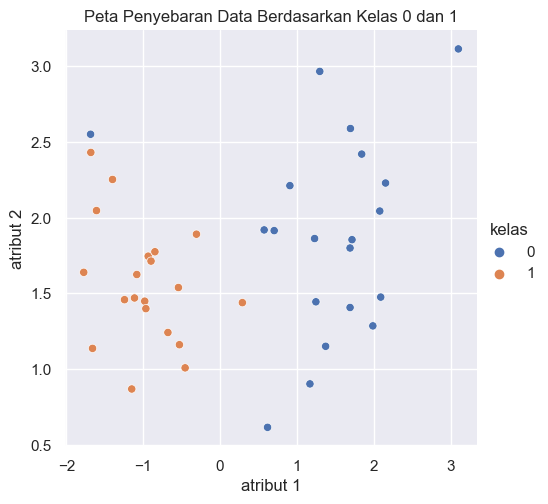

In [8]:
sns.set_theme()
sns.relplot(data=df, x="atribut1", y="atribut2", hue="kelas")
plt.title("Peta Penyebaran Data Berdasarkan Kelas 0 dan 1")
plt.xlabel("atribut 1")
plt.ylabel("atribut 2")
plt.show()

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [44]:
train_idx = [i for i in range(0, 15)] + [i for i in range(20, 35)]
test_idx = [i for i in range(15, 20)] + [i for i in range(35, 40)]

train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]

X_train = train_data.drop('kelas', axis=1)
y_train = train_data['kelas']

X_test = test_data.drop('kelas', axis=1)
y_test = test_data['kelas']

In [39]:
neighbors = np.arange(1, 13)
train_acc = {}
test_acc = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    
    knn.fit(X_train, y_train)
    
    train_acc[neighbor] = knn.score(X_train, y_train)
    test_acc[neighbor] = knn.score(X_test, y_test)

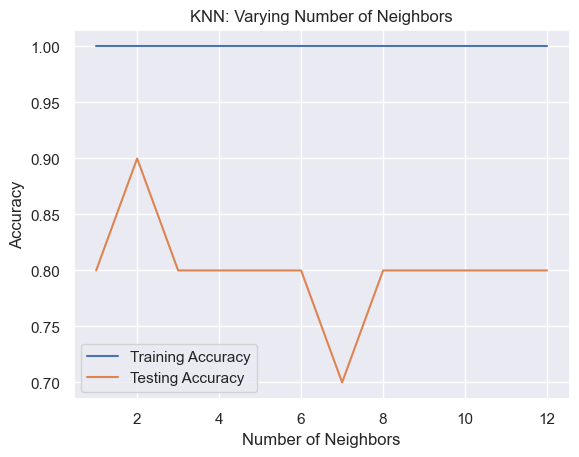

In [40]:
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_acc.values(), label="Training Accuracy")

plt.plot(neighbors, test_acc.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [42]:
y_pred = knn.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

